## ETL

In [1]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda
from src import soporte_correlacion as sp_corr

In [2]:
df = pd.read_csv("files/wines_SPA.csv")
df.head(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
sp_eda.exploracion_basica(df)

### Información general del DataFrame ###
Forma (filas, columnas): (7500, 11)
Columnas: ['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region', 'price', 'type', 'body', 'acidity']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB
---------------------------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
rating,7500.0,4.254933,0.118029,4.20,4.2,4.20,4.20,4.90
num_reviews,7500.0,451.109067,723.001856,25.00,389.0,404.00,415.00,32624.00
price,7500.0,60.095822,150.356676,4.99,18.9,28.53,51.35,3119.08
body,6331.0,4.158427,0.583352,2.00,4.0,4.00,5.00,5.00
acidity,6331.0,2.946612,0.248202,1.00,3.0,3.00,3.00,3.00



### Estadísticas descriptivas para variables categóricas ###


,count,unique,top,freq
winery,7500,480,Contino,457
wine,7500,847,Reserva,467
year,7498,71,2011,1190
country,7500,1,Espana,7500
region,7500,76,Rioja,2440
type,6955,21,Rioja Red,2357


In [4]:
duplicados = df[df.duplicated].sort_values('wine')
duplicados.head(100)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
4455,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
7281,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
2230,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
6906,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
5230,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7106,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
2430,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
3655,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0
2330,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.9,Mencia,3.0,3.0


In [5]:
df = df.drop_duplicates() 

In [6]:
sp_eda.exploracion_basica(df, secciones=['info', 'duplicados'])

### Información general del DataFrame ###
Forma (filas, columnas): (2048, 11)
Columnas: ['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region', 'price', 'type', 'body', 'acidity']

Resumen info():
<class 'pandas.core.frame.DataFrame'>
Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB
--------------------------------------------------------------------------

La columna 'body' es de tipo float64.
El número total de valores únicos es de 4.
Los valores únicos son: [ 5.  4.  3. nan  2.]


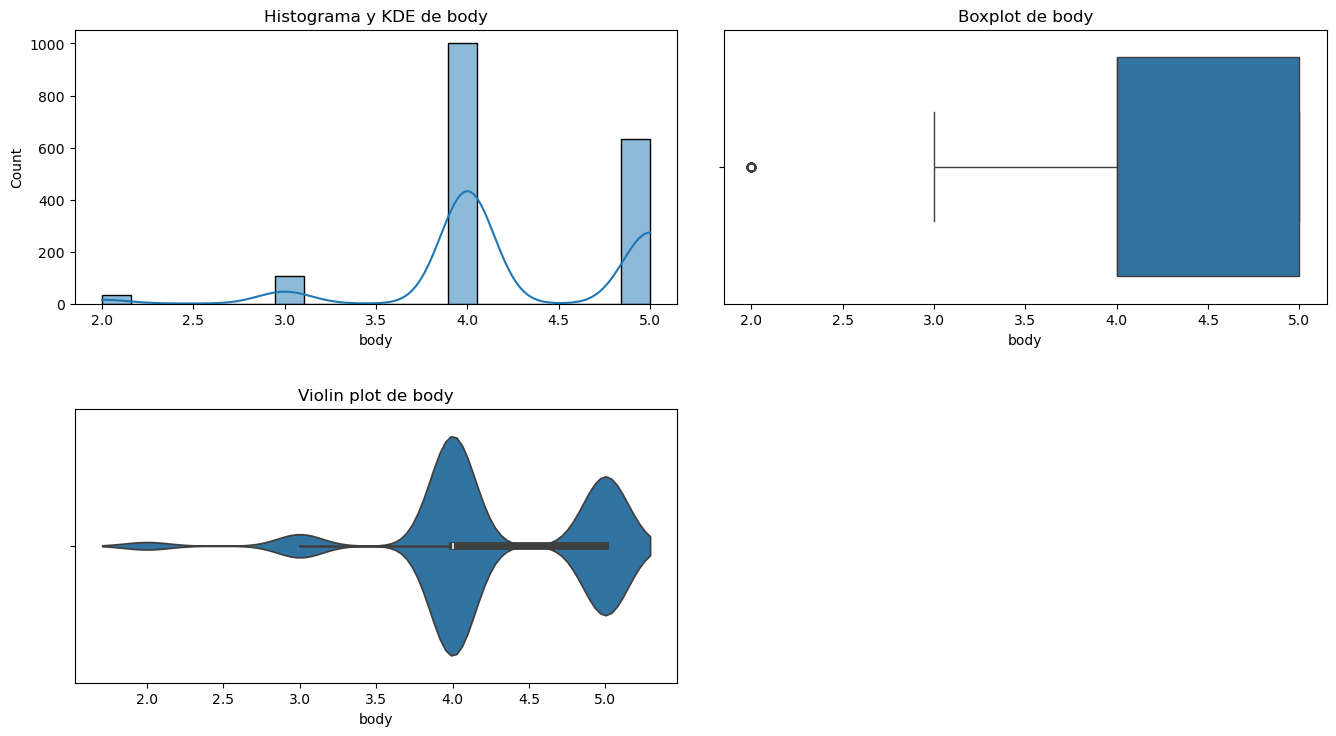

--------------------------------------------------------------------------
return - stats dict:


{'min': 2.0,
 'max': 5.0,
 'mean': np.float64(4.26),
 'median': 4.0,
 'std': 0.65,
 'percentil_25': np.float64(4.0),
 'percentil_75': np.float64(5.0)}

In [7]:
sp_eda.exploracion_num(df,'body', graficos=True, mostrar_estadisticas=False, mostrar_outliers=False)

## acidity: 
Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

La columna 'acidity' es de tipo float64.
El número total de valores únicos es de 3.
Los valores únicos son: [ 3.  2.  1. nan]


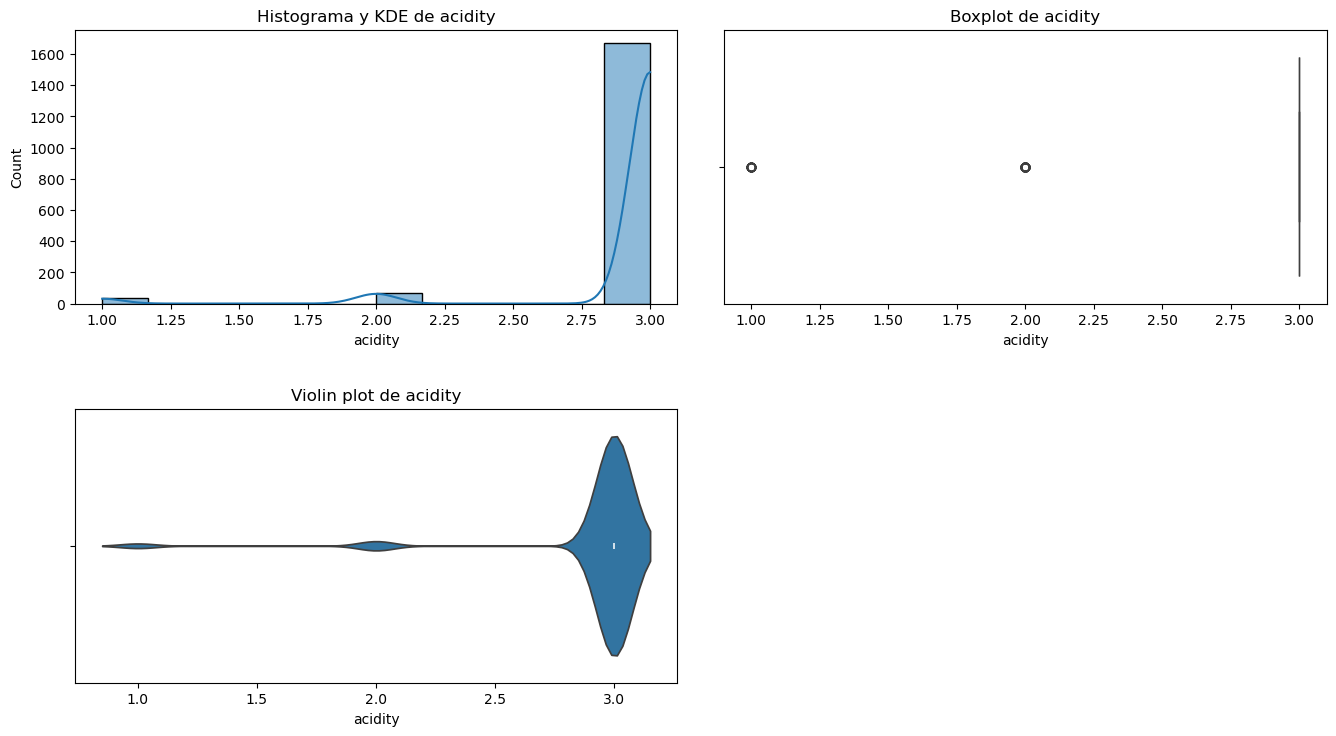

--------------------------------------------------------------------------
return - stats dict:


{'min': 1.0,
 'max': 3.0,
 'mean': np.float64(2.92),
 'median': 3.0,
 'std': 0.33,
 'percentil_25': np.float64(3.0),
 'percentil_75': np.float64(3.0)}

In [8]:
sp_eda.exploracion_num(df,'acidity', graficos=True, mostrar_estadisticas=False, mostrar_outliers=False)

In [9]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

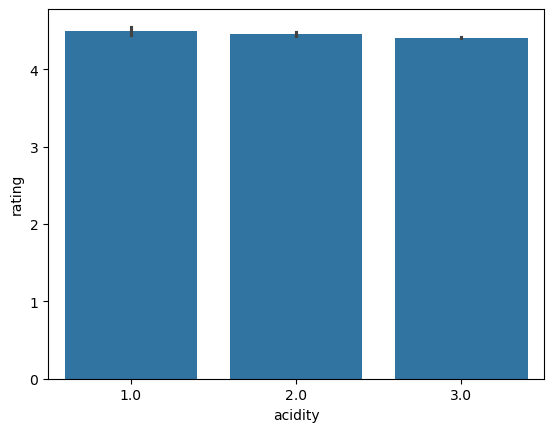

In [10]:
sns.barplot(data=df, y='rating',x='acidity');

--------------------------------------------------------------------------

📊 Exploración categórica de 'type':
 - Moda: Ribera Del Duero Red
 - Cardinalidad (nº de categorías distintas): 22
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


type
Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
NaN                     106
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: count, dtype: int64


Frecuencias relativas (%):


type
Ribera Del Duero Red    26.12
Rioja Red               22.02
Priorat Red             11.62
Red                     10.25
NaN                      5.18
Toro Red                 3.81
Tempranillo              3.56
Sherry                   2.73
Rioja White              1.81
Pedro Ximenez            1.71
Grenache                 1.71
Albarino                 1.66
Cava                     1.61
Verdejo                  1.32
Monastrell               0.88
Mencia                   0.83
Montsant Red             0.83
Syrah                    0.73
Chardonnay               0.63
Cabernet Sauvignon       0.54
Sparkling                0.24
Sauvignon Blanc          0.20
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


type
Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
NaN                     106
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 8


type
Monastrell            0.88
Mencia                0.83
Montsant Red          0.83
Syrah                 0.73
Chardonnay            0.63
Cabernet Sauvignon    0.54
Sparkling             0.24
Sauvignon Blanc       0.20
Name: proportion, dtype: float64

--------------------------------------------------------------------------


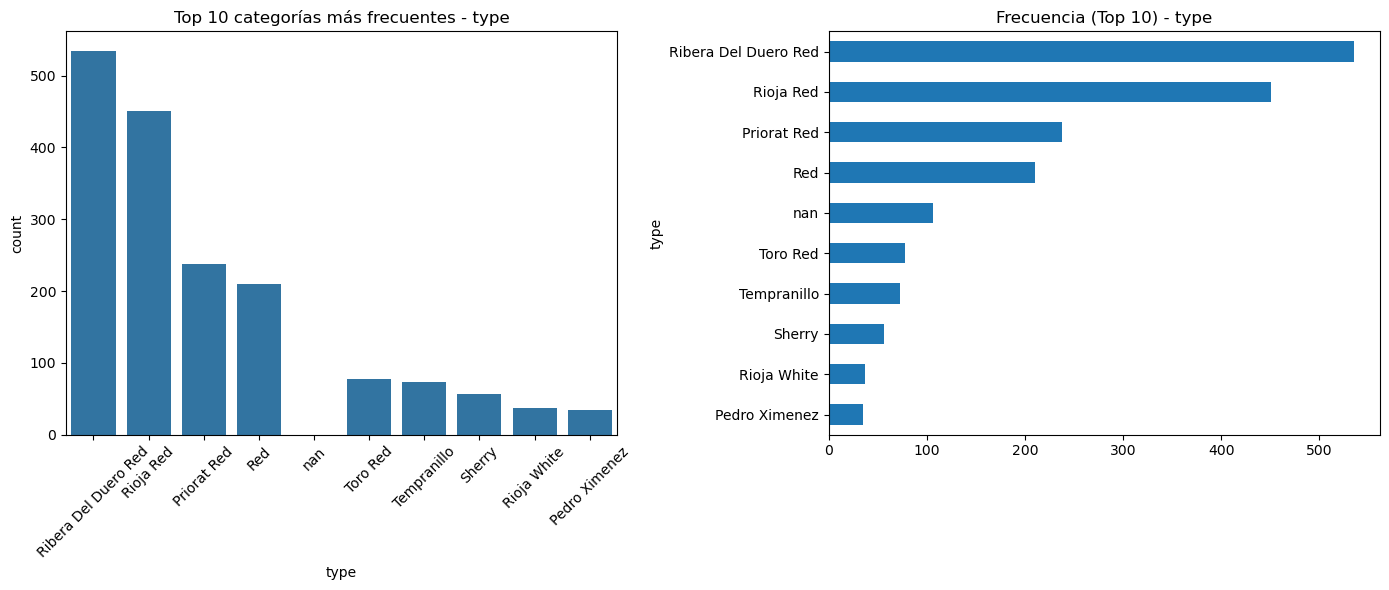

{'moda': 'Ribera Del Duero Red',
 'cardinalidad': 22,
 'frecuencias_abs': type
 Ribera Del Duero Red    535
 Rioja Red               451
 Priorat Red             238
 Red                     210
 NaN                     106
 Toro Red                 78
 Tempranillo              73
 Sherry                   56
 Rioja White              37
 Pedro Ximenez            35
 Grenache                 35
 Albarino                 34
 Cava                     33
 Verdejo                  27
 Monastrell               18
 Mencia                   17
 Montsant Red             17
 Syrah                    15
 Chardonnay               13
 Cabernet Sauvignon       11
 Sparkling                 5
 Sauvignon Blanc           4
 Name: count, dtype: int64,
 'frecuencias_rel': type
 Ribera Del Duero Red    26.12
 Rioja Red               22.02
 Priorat Red             11.62
 Red                     10.25
 NaN                      5.18
 Toro Red                 3.81
 Tempranillo              3.56
 Sherry      

In [11]:
sp_eda.exploracion_cat(df,'type', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)

In [20]:
mask = df['type'].isna()

In [18]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [47]:
df_list = df[mask]['wine'].unique().tolist()

In [48]:
len(df_list)

79

In [56]:
df[mask].sample(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1725,Emilio Moro,La Revelia Godello,2019,4.3,37,Espana,Bierzo,21.65,NaN,NaN,NaN
1101,Gutierrez de la Vega,Casta Diva Cosecha Miel Moscatel Dulce,2018,4.4,27,Espana,Alicante,15.50,NaN,NaN,NaN
1040,Bodegas Mas Alta,La Solana Alta,2018,4.4,39,Espana,Priorato,43.50,NaN,NaN,NaN
1714,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,2018,4.3,38,Espana,Alicante,16.45,NaN,NaN,NaN
1934,Gramona,Gessami,2020,4.2,692,Espana,Penedes,11.20,NaN,NaN,NaN
576,Veigamoura,Blanco,2013,4.5,45,Espana,Rias Baixas,14.96,NaN,NaN,NaN
1530,Can Rafols dels Caus,El Rocallis,2015,4.3,83,Espana,Cataluna,88.00,NaN,NaN,NaN
488,Rafael Palacios,As Sortes Val do Bibei Godello,2020,4.5,115,Espana,Valdeorras,55.00,NaN,NaN,NaN
312,Pago de Larrainzar,Rosado de Larrainzar,2020,4.6,39,Espana,Navarra,12.00,NaN,NaN,NaN
1327,Castell d'Encus,Ekam,2019,4.3,257,Espana,Costers del Segre,24.61,NaN,NaN,NaN


In [52]:
df[
    (df['winery'] == 'Finca Moncloa') &
    (df['wine'] == 'Tintilla de Rota')
].sort_values('year')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13,NaN,NaN,NaN
318,Finca Moncloa,Tintilla de Rota,2017,4.6,37,Espana,Cadiz,43.10,NaN,NaN,NaN


In [58]:
df['wine'].isna().sum()

np.int64(0)

In [62]:
df_year = df['year'].isna()

In [ ]:
df[df_year]
#rellenar Vega Sicilia	Unico Reserva Especial Edicion 'year' = 2009, 2011 y 2012.
# La Unica	Fourth Edition = 2017 y 2018

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Espana,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [64]:
df['winery'].isna().sum()

np.int64(0)

In [65]:
df['rating'].isna().sum()

np.int64(0)

In [67]:
df['num_reviews'].isna().sum()

np.int64(0)

In [68]:
df['price'].isna().sum()

np.int64(0)

In [69]:
df['region'].isna().sum()

np.int64(0)

In [ ]:
df['region'].unique()
# crear una nueva columna de 'provincia'
# evaluar si eliminamos columna "country" porque no sabemos si la necesitamos para la visualizacion del mapa

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

In [71]:
df['type'].isna().sum()

np.int64(106)

In [72]:
df['body'].isna().sum()

np.int64(271)

In [73]:
df_body = df['body'].isna()

In [74]:
df[df_body]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [ ]:
df['acidity'].isna().sum()
#body y acidity tienen mas nulos que type, primero vamos a ver si podemos rellenar type

np.int64(271)

In [77]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [78]:
col_esp = {
    'winery': 'bodega',
    'wine': 'vino',
    'year': 'anio',
    'rating': 'calificacion',
    'num_reviews': 'num_resenas',
    'country': 'pais',
    'region': 'region',
    'price': 'precio',
    'type': 'tipo',
    'body': 'cuerpo',
    'acidity': 'acidez'
}

In [79]:
df.rename(columns=col_esp, inplace=True)

In [80]:
df.columns

Index(['bodega', 'vino', 'anio', 'calificacion', 'num_resenas', 'pais',
       'region', 'precio', 'tipo', 'cuerpo', 'acidez'],
      dtype='object')

In [82]:
df['tipo'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [83]:
tipo_esp = {
    'Toro Red': 'Toro Tinto',
    'Ribera Del Duero Red': 'Ribera del Duero Tinto',
    'Red': 'Tinto',
    'Sherry': 'Jerez',
    'Priorat Red': 'Priorat Tinto',
    'Rioja Red': 'Rioja Tinto',
    'Rioja White': 'Rioja Blanco',
    'Grenache': 'Garnacha',
    'Sparkling': 'Espumoso',
    'Montsant Red': 'Montsant Tinto',
    'Sauvignon Blanc': 'Sauvignon Blanc',
    'Albarino': 'Albarino' 
}

In [84]:
df['tipo'].replace(tipo_esp, inplace=True)

In [85]:
df['tipo'].unique()

array(['Toro Tinto', 'Tempranillo', 'Ribera del Duero Tinto',
       'Pedro Ximenez', 'Tinto', 'Jerez', 'Priorat Tinto', 'Rioja Tinto',
       'Rioja Blanco', 'Garnacha', nan, 'Cava', 'Verdejo', 'Syrah',
       'Monastrell', 'Mencia', 'Espumoso', 'Montsant Tinto', 'Albarino',
       'Chardonnay', 'Cabernet Sauvignon', 'Sauvignon Blanc'],
      dtype=object)

In [86]:
df.head(10)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bodega        2048 non-null   object 
 1   vino          2048 non-null   object 
 2   anio          2046 non-null   object 
 3   calificacion  2048 non-null   float64
 4   num_resenas   2048 non-null   int64  
 5   pais          2048 non-null   object 
 6   region        2048 non-null   object 
 7   precio        2048 non-null   float64
 8   tipo          1942 non-null   object 
 9   cuerpo        1777 non-null   float64
 10  acidez        1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


In [101]:
df.loc[
    (df['bodega'] == 'Vega Sicilia') & (df['vino'] == 'Unico Reserva Especial Edicion') & (df['anio'].isna()),
    'año'
] = 2009 - 2011 - 2012

In [95]:
df.loc[
    (df['bodega'] == 'La Unica') & (df['vino'] == 'Fourth Edition') & (df['anio'].isna()),
    'anio'
] = 2017 - 2018

In [102]:
mask2 = df['anio'].isna()

In [103]:
df[mask2]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,año
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera del Duero Tinto,5.0,3.0,-2014.0


In [105]:
df['region'].reset_index()

,index,region
0,0,Toro
1,1,Vino de Espana
2,2,Ribera del Duero
3,3,Ribera del Duero
4,4,Ribera del Duero
...,...,...
2043,2046,El Terrerazo
2044,2047,Ribera del Duero
2045,2048,Ribera del Duero
2046,2049,Rioja


In [109]:
df['region'].nunique()

76

In [110]:
df['region'].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle